In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
from scipy.integrate import quad
from scipy.stats import powerlaw
import random
import math

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

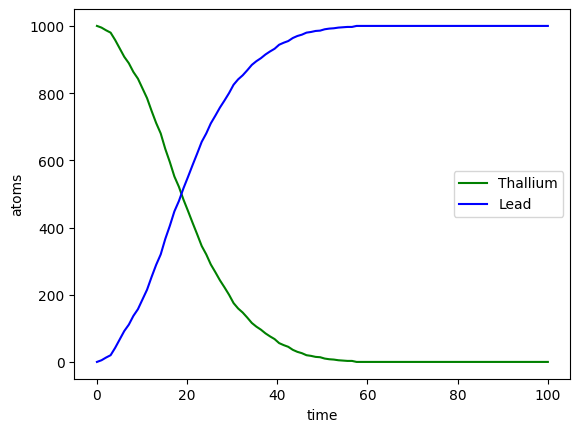

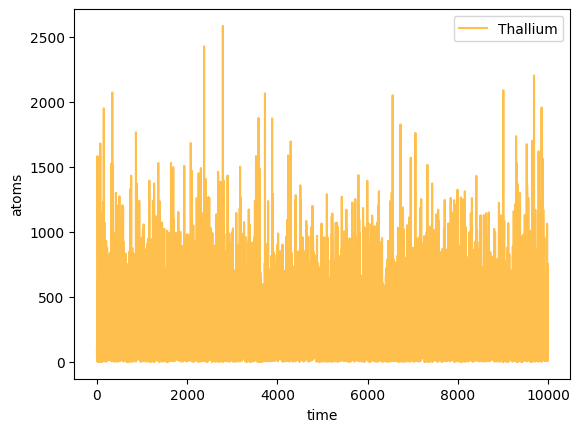

In [31]:
# Constants
tau = 3.052 * 60  # seconds
Tha_initial = 1000
Lea_initial = 0
time = np.linspace(0, 100, 100)

# probability function
def prob(t, tau):
    probability = 1-2**(-t/tau)
    return probability

# initialization
Tha = np.zeros(100)
Tha[0] = Tha_initial
Lea = np.zeros(100)
Lea[0] = Lea_initial

# method 1
for t in range(1, 100):
    sub = np.sum(np.random.rand(Tha_initial) <= prob(t, tau))
    Tha_initial -= sub
    Lea_initial += sub
    Tha[t] = Tha_initial
    Lea[t] = Lea_initial

# plot
plt.plot(time, Tha, 'g', label='Thallium')
plt.plot(time, Lea, 'b', label='Lead')
plt.xlabel('time')
plt.ylabel('atoms')
plt.legend()
plt.show()

# method 2
def prob2(t, tau= 3.052 * 60):
    return (2 ** (-t / tau)) * (np.log(2) / tau)

def prob2_cdf(x, tau= 3.052 * 60):
    return 1- 2**(-x/tau)

def prob2_icdf(p, tau= 3.052 * 60):
    return -tau * np.log2(1 - p)

u = np.random.random(10000)
v = prob2_icdf(u) 
x = np.arange(0,len(v),1)
plt.plot(x, v, 'orange', alpha=0.7, label='Thallium') 
plt.xlabel('time')
plt.ylabel('atoms')
plt.legend()
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

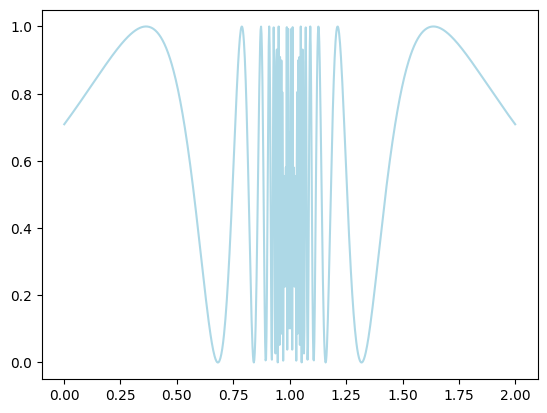

Hit/miss estimate of the integral of f(x) between 0 and 2: 1.3588
Error of hit/miss:  0.0009584198662381744
Mean value estimate of the integral of f(x) between 0 and 2: 1.2774552117065436
Error of mean value: 0.06976474841317586


In [50]:
def f(x):
    return (np.sin(1. / (1-x)))**2

x=np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x), 'lightblue')
plt.show()

# hit/miss method
n = int(1e4)
hits = 0
misses = 0

for i in range(n):
    xx = np.random.uniform()
    yy = np.random.uniform()
    if yy <= f(xx):
        hits += 1    
    else:
        misses += 1
        
int_est = 2*hits/n
print('Hit/miss estimate of the integral of f(x) between 0 and 2:', int_est)

# error of the estimation
N = 100
hits = 0
int_est_all = np.zeros(N)

for j in range(N):
    hits = 0
    for i in range(n):
        xx2 = np.random.uniform()
        yy2 = np.random.uniform()
        if yy2 <= f(xx2):
            hits += 1    
        else:
            misses += 1
    int_est_all[j] = 2*hits/n
    
mean = np.mean(int_est_all)
var = np.var(int_est_all)
int_err= np.sqrt(var/N)
print('Error of hit/miss: ', std_err)

# mean value method
def mean_value(N):
    t = np.random.uniform(0, 2, N)
    int_val = f(t)
    int_est_2 = 2 * np.mean(int_val)
    int_err_2 = 2 * np.std(int_val) / np.sqrt(N)
    return int_est_2, int_err_2

# Perform mean value integral estimation with N trials
int_est_2, int_err_2 = mean_value_integral(N)
print('Mean value estimate of the integral of f(x) between 0 and 2:', int_est_2)
print('Error of mean value:', int_err_2)




3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [27]:
# area of 2D sphere using Monte Carlo method
def f2D(x,y):
    if (x**2+y**2)<=1:
        return 1
    else: return 0
    
count=0
num = 10000
for i in range(num):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    count += f2D(x, y)
    
area = count / num * 4 

print('Area of 2D sphere:', area)

# area of 10D sphere using Monte Carlo method
def f10D(x):
    if (sum(i**2 for i in x))<=1:
        return 1 
    else: return 0

        
count=0
num = 10000
for i in range(num):
    x = [random.uniform(-1, 1) for t in range(10)]
    count += f10D(x)
        
area = count / num * (2**10)

print('Area of 10D sphere:', area)


Area of 2D sphere: 3.1396
Area of 10D sphere: 2.4576


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [71]:
def f(x):
    return (x**(-1/2)) / (np.exp(x) + 1)
def w(x):
    return 1 / np.sqrt(x)

num = 100000
integral_w= quad(w,0,1)

rng = np.random.default_rng()
x = rng.power(0.5,num)

integral = (integral_w[0]/num)*(np.sum(f(x)/w(x)))
print('Result:',integral)

Result: 0.8395011286236871
